In [61]:
import numpy as np
import matplotlib.pyplot as plt

def cplot(complex_function, n=400, xlim=[-2,2], ylim=[-2,2], figsize=(12,6)):
    x = np.linspace(xlim[0], xlim[1], n)
    y = np.linspace(ylim[0], ylim[1], n)

    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y

    W = complex_function(Z)

    plt.figure(figsize=figsize)

    plt.subplot(1, 2, 2)
    plt.imshow(np.angle(W), extent=(xlim[0], xlim[1], ylim[0], ylim[1]), origin='lower', cmap='hsv')
    plt.colorbar()
    plt.title('Phase')

    plt.tight_layout()
    plt.show()

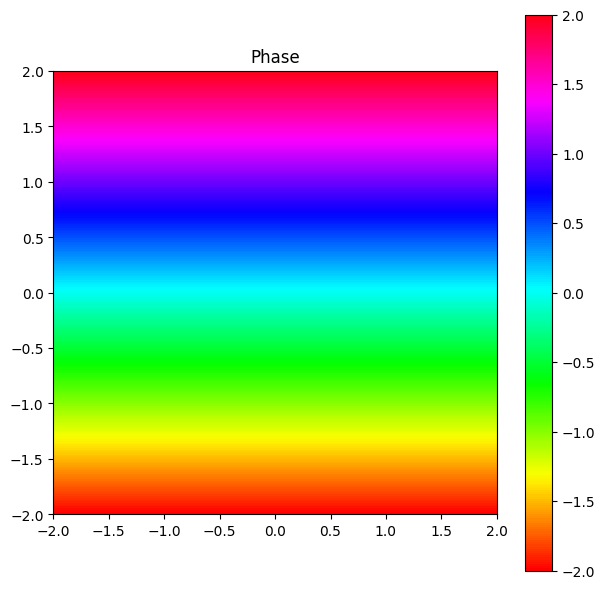

In [62]:
cplot(lambda z: np.exp(z))

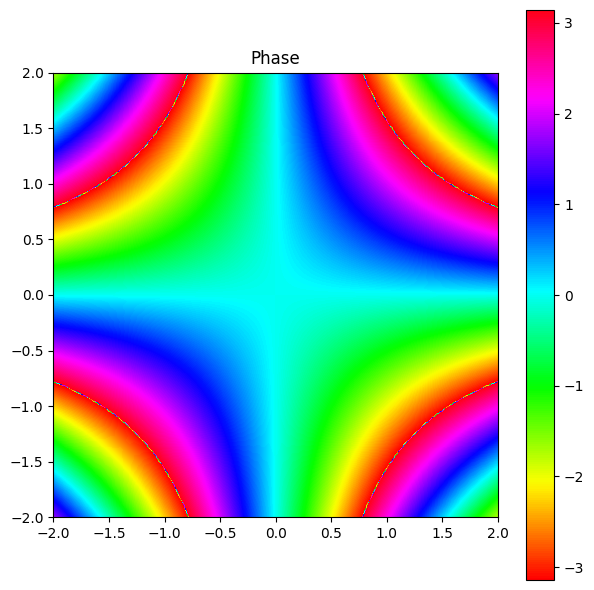

In [63]:
cplot(lambda z: np.exp(z**2))

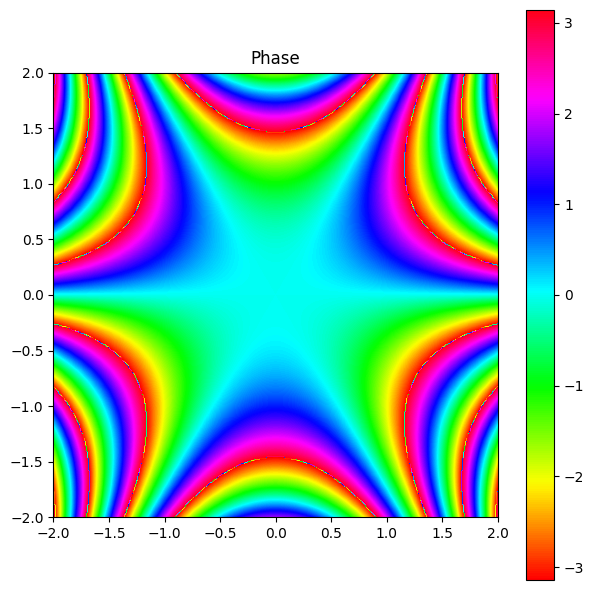

In [64]:
cplot(lambda z: np.exp(z**3))

/var/folders/b6/zjrzfvq14h12kvt3_h7c4fwr0000gn/T/ipykernel_2235/3889163503.py:1: RuntimeWarning: overflow encountered in exp
  cplot(lambda z: np.exp(z**10), xlim=[0, 0.5], ylim=[-2.2, -1.6], figsize=(24,24))


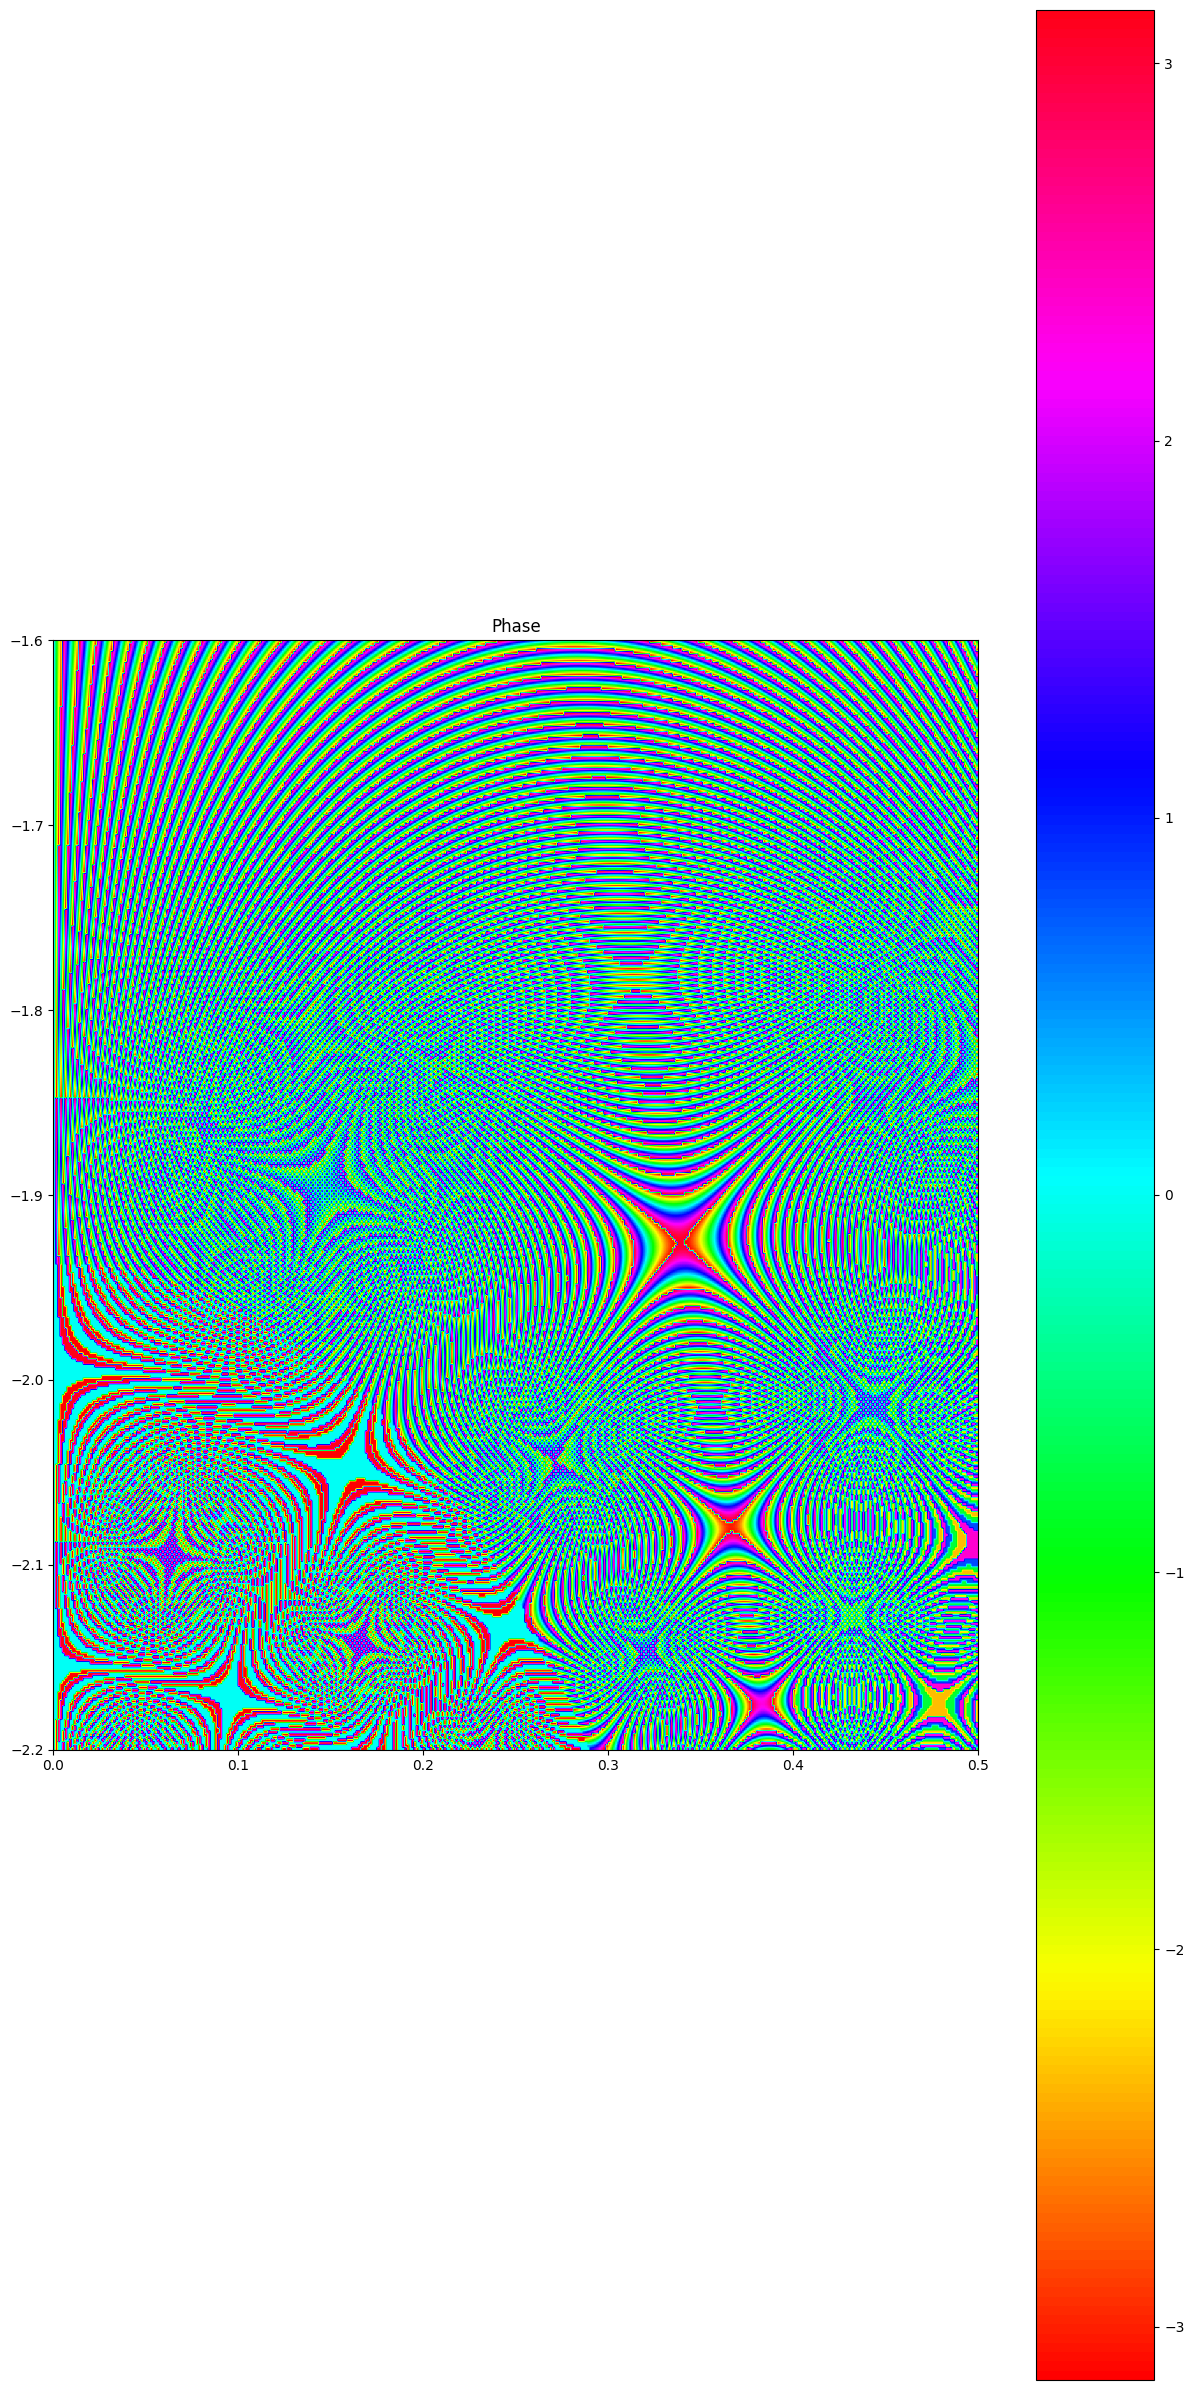

In [65]:
cplot(lambda z: np.exp(z**10), xlim=[0, 0.5], ylim=[-2.2, -1.6], figsize=(24,24))

In [66]:
from sympy import integrate, exp, Symbol, lambdify

from sympy.abc import t

lin = integrate(exp(t), (t, 0, 1))
sqrd = integrate(exp(t**2), (t, 0, 1))
cbd = integrate(exp(t**3), (t, 0, 1))
tth = integrate(exp(t**10), (t, 0, 1))

display(lin, sqrd, cbd, tth)

-1 + E

sqrt(pi)*erfi(1)/2

exp(-I*pi/3)*gamma(1/3)*lowergamma(1/3, exp_polar(I*pi))/(9*gamma(4/3))

exp(-I*pi/10)*gamma(1/10)*lowergamma(1/10, exp_polar(I*pi))/(100*gamma(11/10))

/var/folders/b6/zjrzfvq14h12kvt3_h7c4fwr0000gn/T/ipykernel_2235/1249816454.py:5: RuntimeWarning: overflow encountered in exp
  cbd_ = np.exp(xs**3)
/var/folders/b6/zjrzfvq14h12kvt3_h7c4fwr0000gn/T/ipykernel_2235/1249816454.py:6: RuntimeWarning: overflow encountered in exp
  tth_ = np.exp(xs**4)


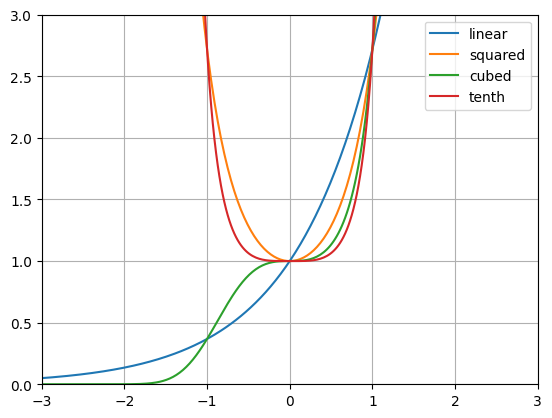

In [67]:
xs = np.linspace(-10,10,1000)

lin_ = np.exp(xs)
sqrd_ = np.exp(xs**2)
cbd_ = np.exp(xs**3)
tth_ = np.exp(xs**4)

plt.plot(xs, lin_, label='linear')
plt.plot(xs, sqrd_, label='squared')
plt.plot(xs, cbd_, label='cubed')
plt.plot(xs, tth_, label='tenth')
plt.ylim(0, 3)
plt.xlim(-3, 3)
plt.grid()
# plt.axis('equal')
plt.legend()

# all of these integrals should be real


In [68]:
display(lin, sqrd, cbd, tth)

-1 + E

sqrt(pi)*erfi(1)/2

exp(-I*pi/3)*gamma(1/3)*lowergamma(1/3, exp_polar(I*pi))/(9*gamma(4/3))

exp(-I*pi/10)*gamma(1/10)*lowergamma(1/10, exp_polar(I*pi))/(100*gamma(11/10))

In [100]:
def riemann(f, mesh_size=100, xlim=[0,1], plot=False):
    '''
    Computes the Riemann sum of f over the interval xlim
    '''

    xs = np.linspace(xlim[0], xlim[1], int(mesh_size))
    ys = np.exp(xs)
    tally = 0
    for i, (xi, yi) in enumerate(zip(xs, ys)):
        if i == 0 or i == len(xs):
            continue

        dx = xs[i] - xs[i-1]


        tally += yi * dx
        if plot:
            for x_ in np.linspace(xi-dx, xi, 2):
                plt.plot([x_, x_], [0, f(x_)], 'r')
    
    if plot:
        plt.plot(xs, ys)


        plt.show()

    return tally

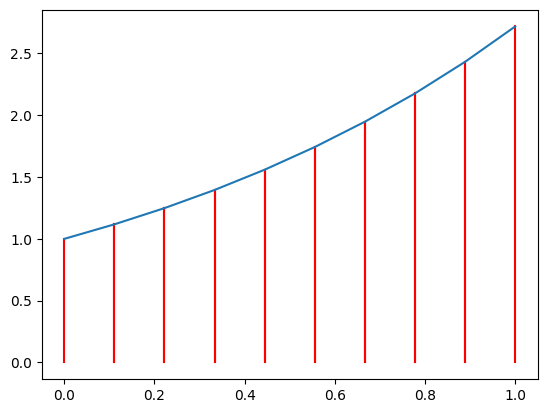

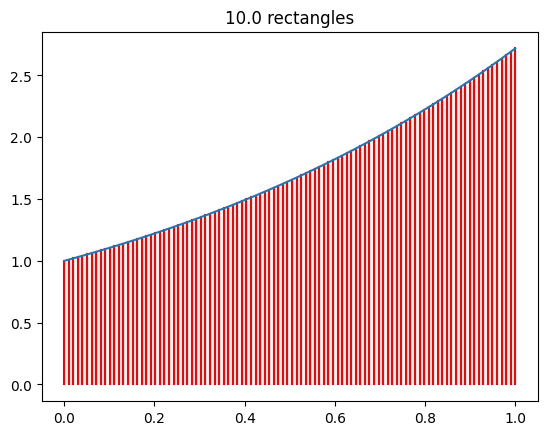

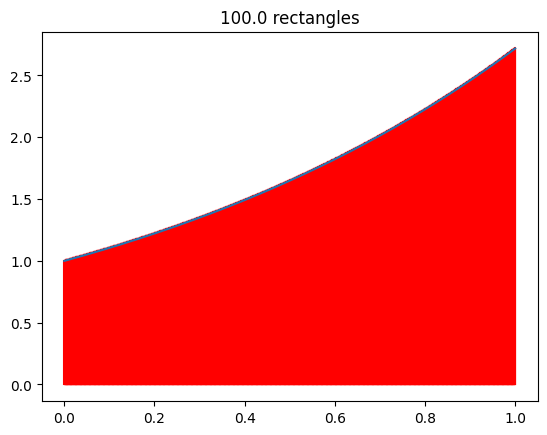

KeyboardInterrupt: 

In [103]:
approximations = []
for i in [1e1, 1e2, 1e3, 1e4, 1e6, 1e9]:
    if i<1e5:
        approximations.append(riemann(np.exp, mesh_size=i, xlim=[0,1], plot=True))
        plt.title(f'{i} rectangles')
    approximations.append(riemann(np.exp, mesh_size=i, xlim=[0,1], plot=False))

In [105]:
approximations

[1.8155093460652276,
 1.8155093460652276,
 1.726974629236272,
 1.726974629236272,
 1.7191419728511506,
 1.7191419728511506]

In [108]:
errors = np.array(approximations) - val

errors

array([0.09722752, 0.09722752, 0.0086928 , 0.0086928 , 0.00086014,
       0.00086014])

In [69]:
from scipy.integrate import quad

In [106]:
val, e =quad(lambda t: np.exp(t), 0, 1)

In [72]:
ex1 = lambda x: np.exp(x)
ex2 = lambda x: np.exp(x**2)
ex3 = lambda x: np.exp(x**3)
ex4 = lambda x: np.exp(x**10)

quad(ex1, 0, 1)

(1.7182818284590453, 1.9076760487502457e-14)